# Productivity Performance of Garment-Production Employees

**Background**

The Garment Industry is one of the key examples of the industrial globalization of this modern era. It is a highly labour-intensive industry with lots of manual processes. Satisfying the huge global demand for garment products is mostly dependent on the production and delivery performance of the employees in the garment manufacturing companies. So, it is highly desirable among the decision makers in the garments industry to track, analyse and predict the productivity performance of the working teams in their factories

**Objective**


To make predictions about garment employees productivity

**Dataset**

The dataset was obtained from https://archive.ics.uci.edu/ml/datasets/Productivity+Prediction+of+Garment+Employees

| Column | Description |
| :----------- | :----------- |
| Date | Date in MM-DD-YYYY |
| Quarter | Categorical, A portion of the month. A month was divided into four quarters |
| Department | Categorical, the department associated |
| Day | Categorical, Day of the week |
| Team_no. | Continuous, the associated team number |
| No. of_Workers | Continuous, Number of workers in each team |
| No. of style change | Continuous, Number of changes in the style of a particular product |
| Targeted productivity | Continuous, Targeted productivity set by the Authority for each team for each day |
| SMV | Continuous, Standard Minute Value is the allocated time for a task in minutes |
| WIP | Continuous, Work in progress includes the number of unfinished items for products |
| Overtime | Continuous, Represents the amount of overtime by each team in minutes |
| Incentive | Continuous,Represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action |
| Idle Time | Continuous,The amount of time when the production was interrupted due to several reasons |
| Idle Men | Continuous, The number of workers who were idle due to production interruption |
| Actual Productivity | Continuous, The actual % of productivity that was delivered by the workers. It ranges from 0-1.|


In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
from sklearn.preprocessing import MinMaxScaler


In [2]:
#Read csv file to dataframe
garmentsData = pd.read_csv("/Users/kgaug/OneDrive/My Projects/garments_worker_productivity.csv")

In [3]:
#Dataset Inspection
garmentsData.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [4]:
#Dataset Overview shows total columns (15), rows (1197) and datatypes
garmentsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [5]:
#Check for unique Values
garmentsData.nunique()

date                      59
quarter                    5
department                 3
day                        6
team                      12
targeted_productivity      9
smv                       70
wip                      548
over_time                143
incentive                 48
idle_time                 12
idle_men                  10
no_of_style_change         3
no_of_workers             61
actual_productivity      879
dtype: int64

In [6]:
#Check for null values
garmentsData.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

### Data Cleaning



- Only the WIP variable has missing values
- These will be replaced with 0, thus indicating finished products which therefore do not have a wip value (0)
- Spelling checks are corrected ('sweing' to 'sewing')
- White spaces are also checked and removed as part of data cleaning

In [7]:
#Replace missing values with 0
garmentsData = garmentsData.fillna(0)
garmentsData.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [8]:
#Replace 'sweing' with 'sewing'
garmentsData.replace({'department' : {'sweing': 'sewing'}}, inplace = True)
garmentsData.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sewing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sewing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sewing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sewing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [9]:
#Check Departments 
garmentsData['department'].value_counts()

sewing        691
finishing     257
finishing     249
Name: department, dtype: int64

In [10]:
#Check Departments Category labels
garmentsData['department'].unique()

array(['sewing', 'finishing ', 'finishing'], dtype=object)

In [11]:
#Remove trailing white spaces
garmentsData['department'] = garmentsData['department'].str.strip()
garmentsData['department'].unique()

array(['sewing', 'finishing'], dtype=object)

### Data Exploration

In [12]:
#Summary Statistics of continuous variables
garmentsData.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
team,1197.0,6.426901,3.463963,1.000000,3.000000,6.000000,9.000000,12.000000
targeted_productivity,1197.0,0.729632,0.097891,0.070000,0.700000,0.750000,0.800000,0.800000
smv,1197.0,15.062172,10.943219,2.900000,3.940000,15.260000,24.260000,54.560000
wip,1197.0,687.228070,1514.582341,0.000000,0.000000,586.000000,1083.000000,23122.000000
over_time,1197.0,4567.460317,3348.823563,0.000000,1440.000000,3960.000000,6960.000000,25920.000000
incentive,1197.0,38.210526,160.182643,0.000000,0.000000,0.000000,50.000000,3600.000000
idle_time,1197.0,0.730159,12.709757,0.000000,0.000000,0.000000,0.000000,300.000000
idle_men,1197.0,0.369256,3.268987,0.000000,0.000000,0.000000,0.000000,45.000000
no_of_style_change,1197.0,0.150376,0.427848,0.000000,0.000000,0.000000,0.000000,2.000000
no_of_workers,1197.0,34.609858,22.197687,2.000000,9.000000,34.000000,57.000000,89.000000


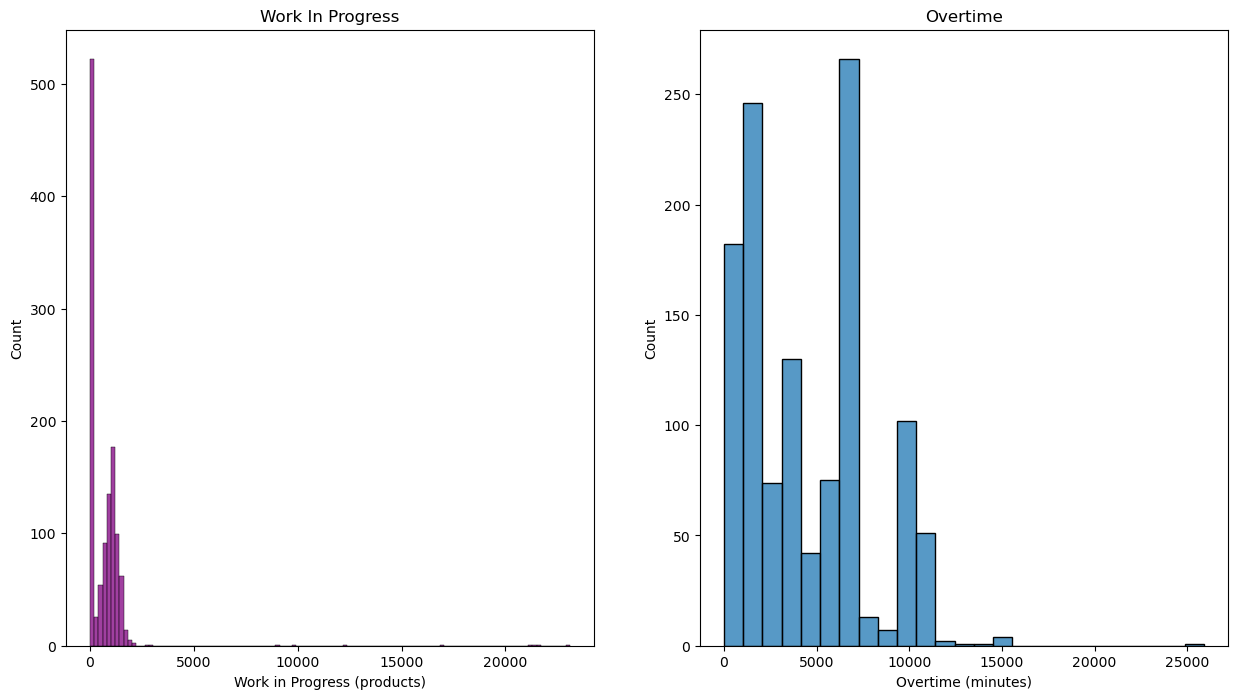

In [13]:
#Examine data distribution for Work in Progress and Overtime
fig, axes = plt.subplots(1, 2, figsize=(15,8))

ax1 = sns.histplot(data=garmentsData['wip'], ax = axes[0], color = 'purple');
ax1.set(xlabel = 'Work in Progress (products)', title='Work In Progress');

ax1 = sns.histplot(data=garmentsData['over_time'], ax = axes[1]);
ax1.set(xlabel = 'Overtime (minutes)', title='Overtime');



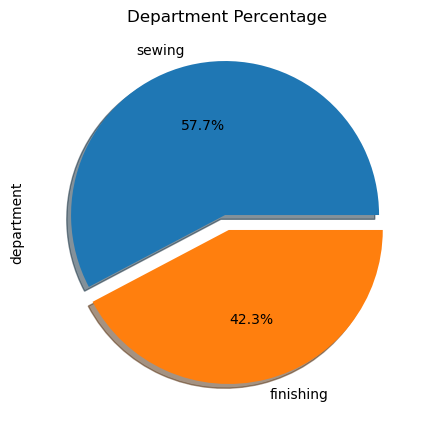

In [14]:
#Examine Categorical variables
garmentsData['department'].value_counts().plot.pie(explode= [0.05, 0.05], autopct = '%1.1f%%', shadow=True, figsize=(7,5))
plt.title('Department Percentage');

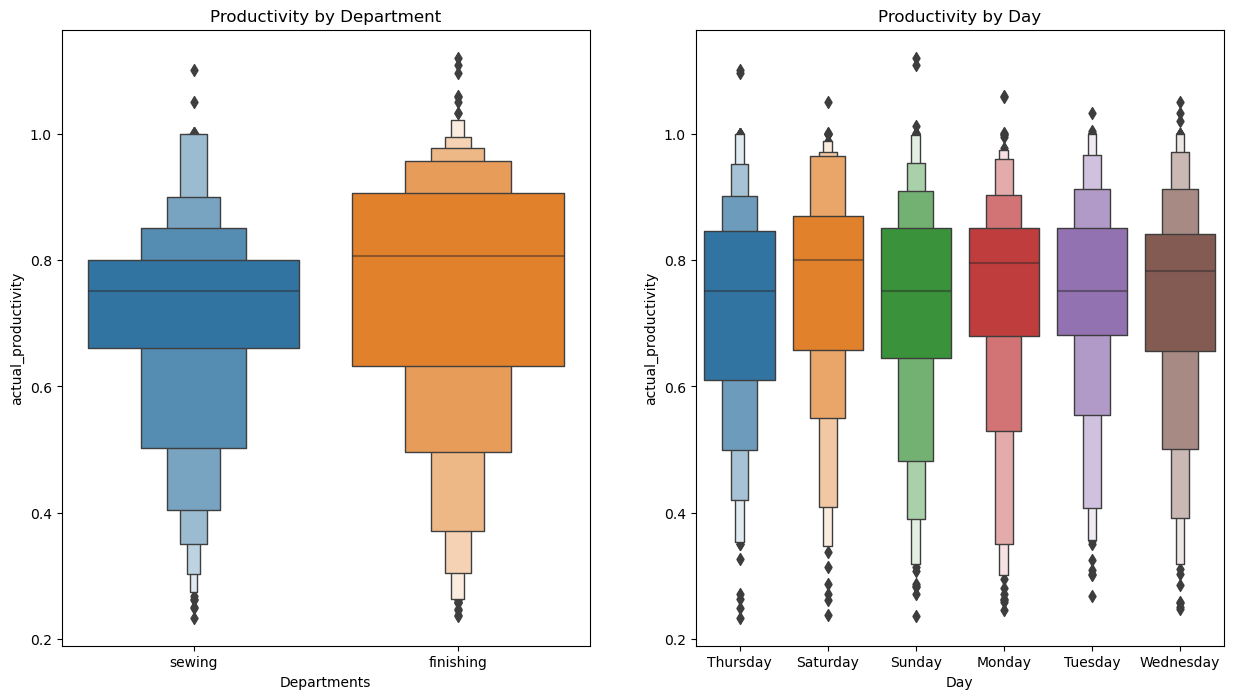

In [15]:
#Examine Categorical variables
fig, axes = plt.subplots(1, 2, figsize=(15,8))

ax1 = sns.boxenplot(x = garmentsData['department'], y = garmentsData['actual_productivity'], ax = axes[0]);
ax1.set(xlabel = 'Departments', title='Productivity by Department');

ax1 = sns.boxenplot(x = garmentsData['day'], y = garmentsData['actual_productivity'], ax = axes[1]);
ax1.set(xlabel = 'Day', title='Productivity by Day');

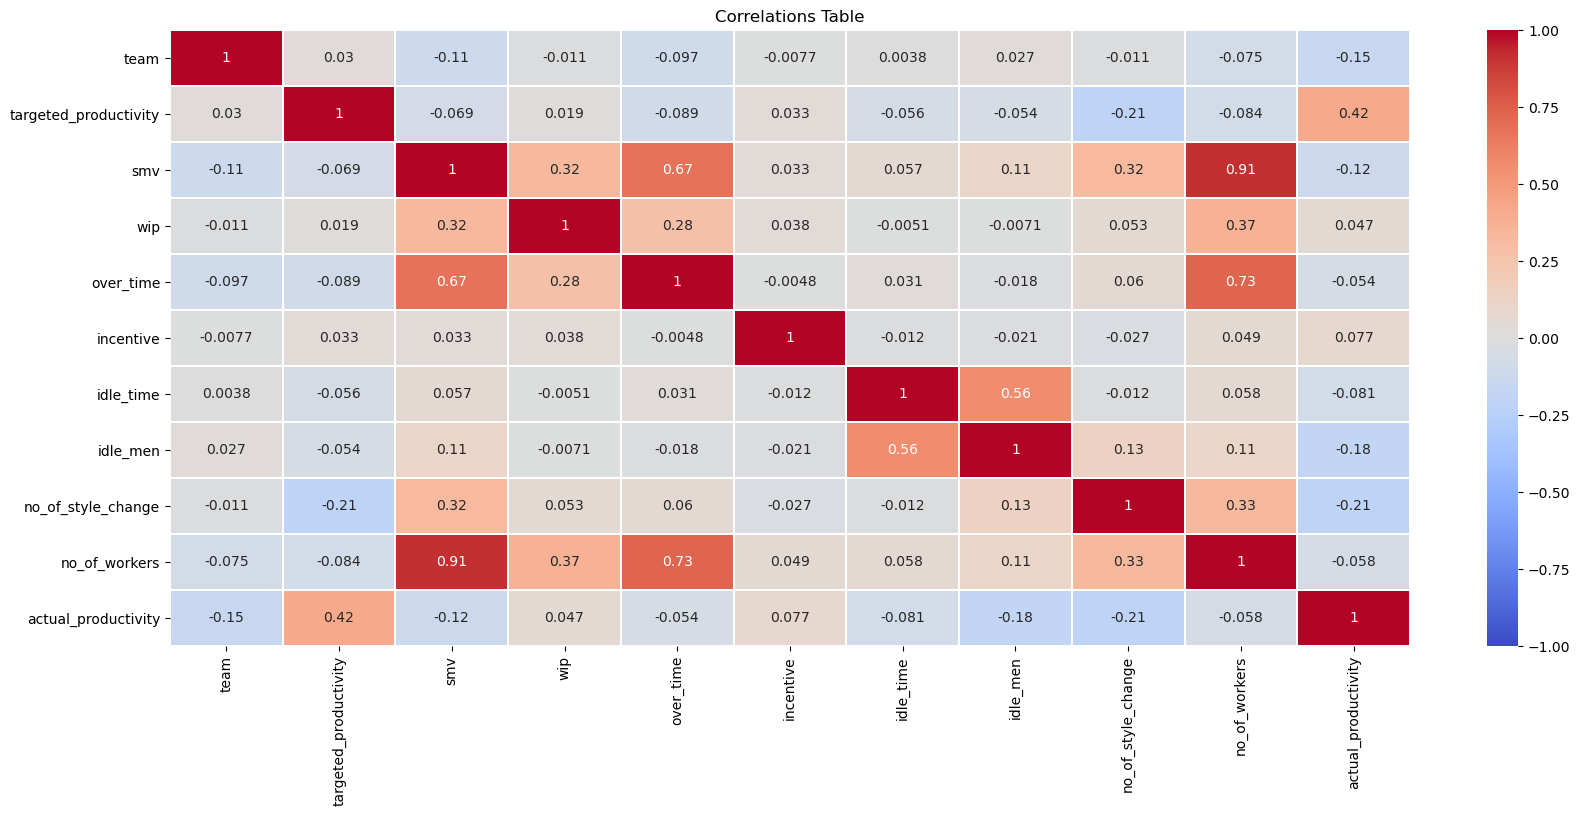

In [16]:
# Plot Correlations matrix
plt.figure(figsize=(20,8))
corrMatrix = garmentsData.corr()

# Plot the correlation coefficient for all continuous pairs
sns.heatmap(corrMatrix, annot=True,linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlations Table')
plt.show()

### Exploration Summary

- From the summary statisctics, *wip* and *overtime* revealed the largest std deviation, 
 indicating the wide spread of observations from the mean.
- To visualise the distribution of *wip* and *overtime*, Histograms were generated which showed positive skewness and thus
implying that the data is unevenly distributed.
- The pie chart reveals that the *sewing* department outnumbers the *finishing* department by 15.4%
- The 1st boxenplot shows that on a productivity range of 0 to 1, the *finishing* team are largely clustered above the mean of apprx. 0.8.
Whereas the *sewing* department occupy a larger density below the mean of apprx 0.7. It appears that the former department is 
more productive despite their lower volume in comparison to the latter. 
- The 2nd boxenplot shows that *Saturday* is most productive as the density is more intense with bigger coverage above the mean
of apprx 0.8.


**Correlations**
- 2 Variable pairs reveal a strong positive correlation where the correlation coefficient is between 0.7 and 0.9
1. *Number of workers* and *standard minute value* , (coefficient = 0.9)
2. *Number of workers* and *overtime* , (coefficient = 0.7)
- A moderate correlation exists between *idle men* and *idle time* , (coefficient = 0.5)
- A moderate correlation also exists between *overtime* and *standard minute value* , (coefficient = 0.6)
- Other variables either have a low positive correllation or are negatively correlated.

### Prepare For Modelling

- **Dependant Variable:** Actual Productivity
- **Independant Variables:** Department, Team, Targeted Productivity, SMV, WIP, Overtime, Idle Time, Idle Men, Number of Style Change and Number of Workers

In [17]:
#Drop non-required columns (categorical)
garmentsData.drop(['date','quarter','day'], axis=1, inplace=True)

In [18]:
#Encode department column to numbers for model inclusion
garmentsData['department'] = np.where(garmentsData['department'] == 'finishing',1,0)
garmentsData.head()

,department,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,0,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.886500
2,0,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,0,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,0,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [19]:
#Create target and Features
target = 'actual_productivity'

X = garmentsData.drop(columns= target)
y = garmentsData[target]

X.head()

,department,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers
0,0,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0
1,1,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0
2,0,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5
3,0,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5
4,0,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0


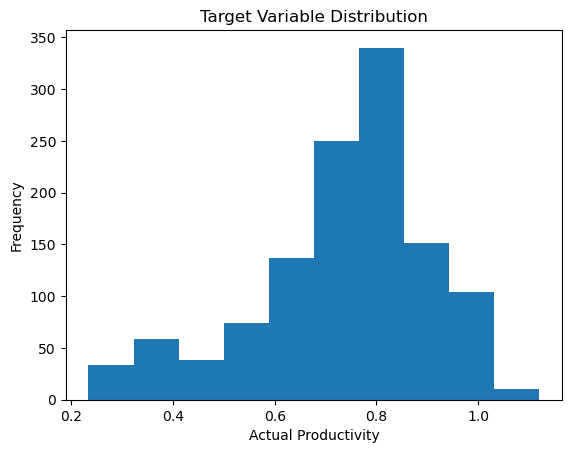

In [20]:
#visualise target variable distribution
plt.hist(garmentsData['actual_productivity'])
plt.xlabel('Actual Productivity')
plt.ylabel('Frequency')
plt.title('Target Variable Distribution')
plt.show()

In [21]:
#Perform 80/20 data split
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2, random_state = 42)

In [22]:
#Check shape to confirm split (80%)
X_train.shape, y_train.shape

((957, 11), (957,))

In [23]:
#Check shape to confirm split (20%)
X_val.shape, y_val.shape

((240, 11), (240,))

In [24]:
#Transform data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

### Random Forest Regression Model
**The model was selected for the following reasons:**
- The learning approach is supervised
- Random Forest Regression handles non-linear relationships efficiently
- The sci-kit learn ensemble combines multiple decision trees to produce an aggregated result, which is more accurate than normal linear regression

In [25]:
#Model definition
model = RandomForestRegressor(n_estimators=100,random_state=42)

In [26]:
#Build Training Model
model.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [27]:
#Validation(test) data accuracy measure
model.score(X_val,y_val)

0.5566661325892401

In [28]:
#Training Data Accuracy measure
model.score(X_train,y_train)

0.831114896617021

In [29]:
#Apply trained model to make predictions on the validation(test) data
y_pred = model.predict(X_val)

In [30]:
#Show model performance
print('Mean Absolute Error (MAE): %.2f'% mean_absolute_error(y_val,y_pred))
print('Mean Squared Error (MSE): %.2f'% mean_squared_error(y_val,y_pred))
print('Root Mean Squared Error (RMSE):',np.sqrt(mean_squared_error(y_val,y_pred)))
print('Explained Variance Score: %.2f'% explained_variance_score(y_val,y_pred))
print('Coefficient of determination (R^2): %.2f' % r2_score(y_val,y_pred))

Mean Absolute Error (MAE): 0.07
Mean Squared Error (MSE): 0.01
Root Mean Squared Error (RMSE): 0.10849703992833795
Explained Variance Score: 0.57
Coefficient of determination (R^2): 0.56


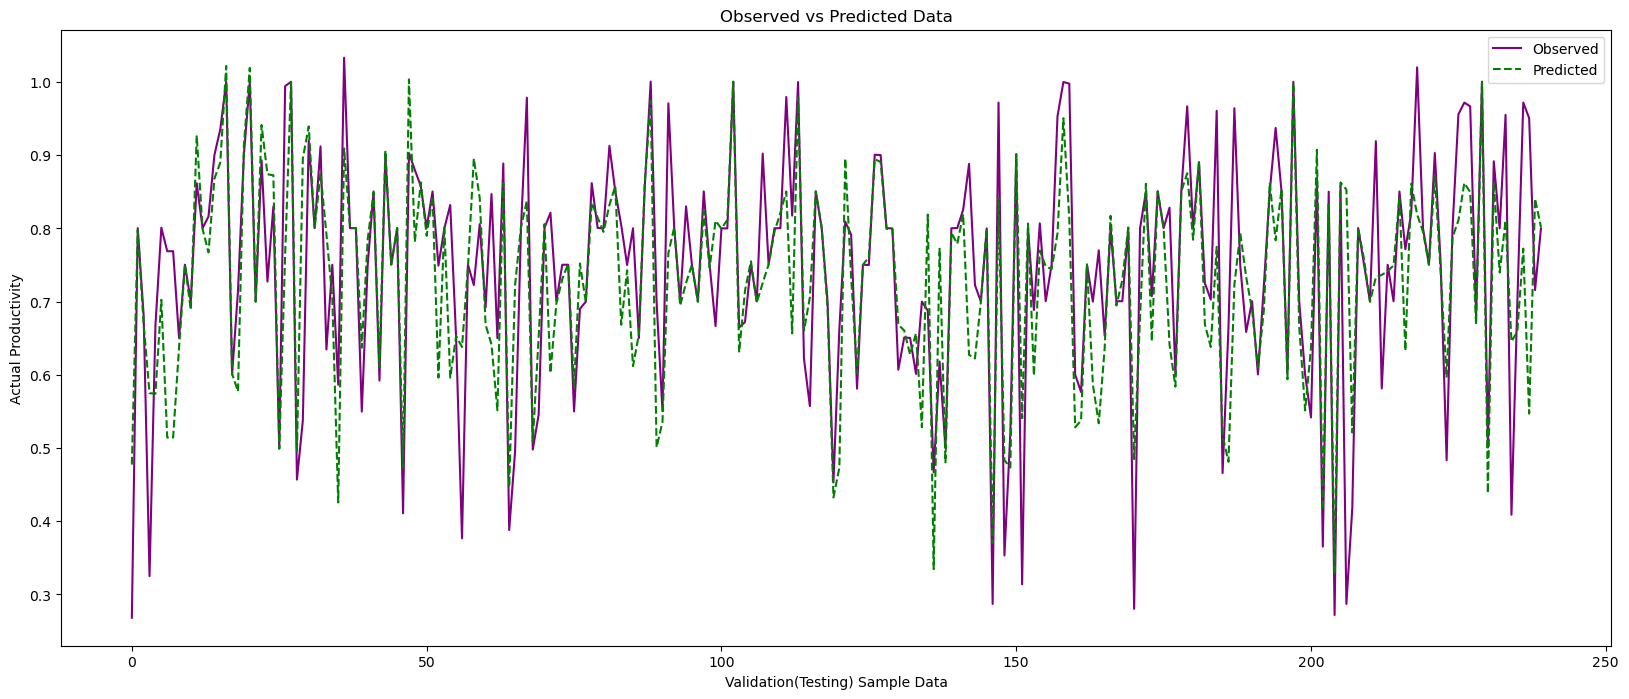

In [31]:
#Show Observed vs Predicted data
plt.figure(figsize=(20,8))
ax = range(len(X_val))

plt.plot(ax, y_val, label='Observed', color = 'purple', linestyle='-')
plt.plot(ax, y_pred, label='Predicted', color = 'green', linestyle='--')
plt.xlabel('Validation(Testing) Sample Data')
plt.ylabel('Actual Productivity')
plt.title('Observed vs Predicted Data')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Features of Importance')

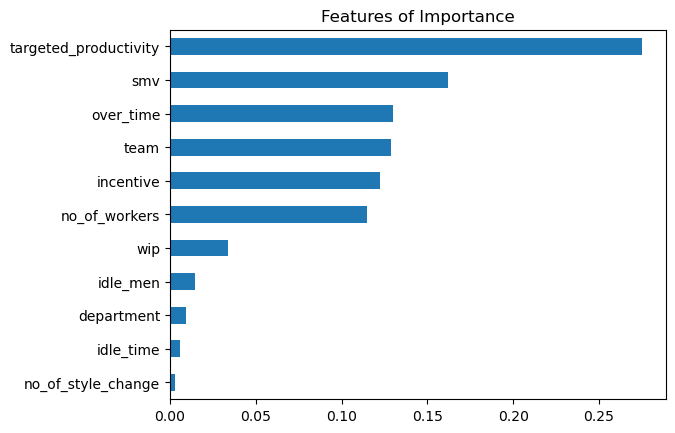

In [32]:
#Visualise Feature Importance
from sklearn.pipeline import Pipeline
feature_list = list(X.columns)
featureImportance = pd.Series(model.feature_importances_,index=feature_list,name='Importance').sort_values(ascending=True)
ax = featureImportance.plot(kind='barh')
plt.title('Features of Importance')

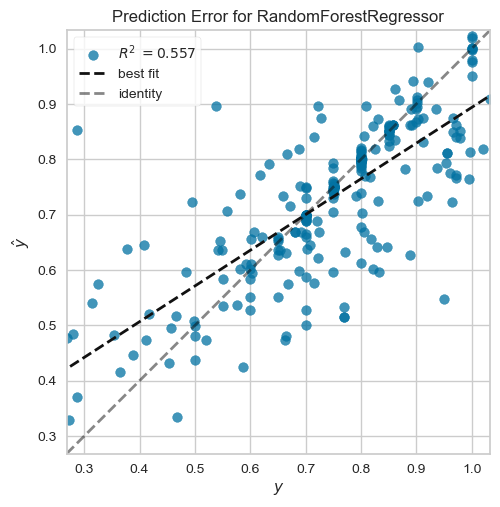

<AxesSubplot:title={'center':'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [33]:
#Visualise Prediction error
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(model)
visualizer.fit(X_train,y_train)
visualizer.score(X_val,y_val)
visualizer.poof()

### Model Evaluation
- The MAE (0.07) and MSE (0.01) indicate a low margin of error
- The RMSE (0.1) is also low, indicating a good-fitting model
- The Explained Variance Score (57%) means there's a high discrepancy between the actual data and the model data. Ideally, we want this number to be as close to 100% as possible
- The Coefficient of Determination (r^2) explains that 56% of the model output can be explained by the independant variables, the remaining 44% is explained by factors outside of our dataset,
like the explained variance score, we would like the r^2 to be as close to 100% as possible
- To obtain a clearer understanding of the model, I visualised the Observed vs Predicted values
- The feature importance bar graph explains how the independant variables contributed to the model, with *targeted productivity* being the most
important and *number of style change* being the least important. When improving the model, the latter may have to be excluded for better accuracy
-The Prediction Error scatterplot visualises the margin of error (distance) between both the best fit and identity lines

### Cross-Validation

In [34]:
#Set the seed to obtain the same results each time cross_validation is performed
seed = 7

In [35]:
#Perform Cross Validation between training and testing data 
#Training data cross validation
from sklearn.model_selection import cross_val_score
score_train = cross_val_score(model,X_train,y_train, scoring='neg_mean_squared_error',cv=10)
score_train

array([-0.02215395, -0.02350672, -0.01091098, -0.02248556, -0.01801958,
       -0.01867874, -0.01424798, -0.01349791, -0.01518638, -0.01746957])

In [36]:
#Print absolute mean score
from numpy import absolute
print(absolute(np.mean(score_train)))

0.017615735852727736


In [37]:
#Testing data cross validation
score_val = cross_val_score(model,X_train,y_train,scoring='neg_mean_squared_error',cv=10)
score_val

array([-0.02215395, -0.02350672, -0.01091098, -0.02248556, -0.01801958,
       -0.01867874, -0.01424798, -0.01349791, -0.01518638, -0.01746957])

In [38]:
#Print absolute mean score
print(absolute(np.mean(score_val)))

0.017615735852727736


### Cross-Validation Summary
- The K-fold Cross-validation method was performed on the training data and validation data where several metrics were explored including accuracy score, r^2, MSE and MAE
- MSE produced better results (0.01), thus indicating how well the model performs on new data 

### Conclusion
- The model cannot be perfectly explained by the independant variables as shown by the coefficient of determination.
- However, the MSE, MAE indicate an acceptable margin of error, this is corroborated by the error prediction scatterplot.
- The employer can therefore use the Random Forest Regression model to predict employee productivity with moderate accuracy.